# How to install:

```bash
bash$: conda create -n astrohack python=3.8
bash$: conda activate astrohack
bash$: pip install astrohack
```

# Start Dask Cluster

In [1]:
from dask.distributed import Client, LocalCluster

# cluster = LocalCluster(
#         n_workers=24,
#         threads_per_worker=1,
#         memory_limit='21GB'
#     )

# client = Client(cluster) 
# print(client.dashboard_link)


from astrohack.astrohack_client import astrohack_local_client

log_parms = {'log_level':'DEBUG'}

client = astrohack_local_client(cores=24,memory_limit='21GB',log_parms=log_parms)
print(client.dashboard_link)

2023-04-11 09:58:07,102 - INFO     - astrohack - (astrohack_client.py:74) - Created client <Client: 'tcp://127.0.0.1:36767' processes=24 threads=24, memory=469.39 GiB>
http://127.0.0.1:8787/status


# Create holog_obs_description

```
holog_obs_description = {0 :
                            {'scans':[2,4,6,8,10,12,14,16,18,20,22],
                             'ant':{'EA25':['EA04', 'EA08', 'EA12', 'EA27', 'EA19']}
                            }
                         }
```

In [2]:
from casacore import tables as ctables
import os
import numpy as np

ctb = ctables.table(
    os.path.join('/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.ms', "ANTENNA"),
    readonly=True,
    lockoptions={"option": "usernoread"},
    ack=False,
)

ant_names = ctb.getcol("NAME")
ant_id = np.arange(len(ant_names))
ant_names

['ea01',
 'ea02',
 'ea03',
 'ea04',
 'ea05',
 'ea06',
 'ea07',
 'ea08',
 'ea09',
 'ea10',
 'ea11',
 'ea12',
 'ea13',
 'ea14',
 'ea15',
 'ea16',
 'ea17',
 'ea18',
 'ea19',
 'ea21',
 'ea22',
 'ea23',
 'ea24',
 'ea25',
 'ea26',
 'ea27',
 'ea28']

In [3]:
from astrohack.extract_holog import extract_holog
import numpy as np
import json

reference_antennas = set([x.lower() for x in ['EA08', 'EA04', 'EA12', 'EA27', 'EA19', 'EA07', 'EA21', 'EA03', 'EA11', 'EA05', 'EA01', 'EA09', 'EA24', 'EA22', 'EA14', 'EA18', 'EA02']])
mapping_antennas = set(ant_names) - reference_antennas
scans = [8,9,10,12,13,14,16,17,18,23,24,25,27,28,29,31,32,33,38,39,40,42,43,44,46,47,48,53,54,55,57]
holog_obs_description = {'map_0':{'ant':{}}}

for m_ant in mapping_antennas:
    holog_obs_description['map_0']['scans'] = scans
    holog_obs_description['map_0']['ant'][m_ant]=reference_antennas
    
    
holog_obs_description['ddi'] = np.arange(16)
print(json.dumps(holog_obs_description, indent=2, default=str))

{
  "map_0": {
    "ant": {
      "ea28": "{'ea12', 'ea02', 'ea19', 'ea03', 'ea22', 'ea07', 'ea11', 'ea21', 'ea27', 'ea04', 'ea09', 'ea08', 'ea05', 'ea01', 'ea24', 'ea18', 'ea14'}",
      "ea16": "{'ea12', 'ea02', 'ea19', 'ea03', 'ea22', 'ea07', 'ea11', 'ea21', 'ea27', 'ea04', 'ea09', 'ea08', 'ea05', 'ea01', 'ea24', 'ea18', 'ea14'}",
      "ea06": "{'ea12', 'ea02', 'ea19', 'ea03', 'ea22', 'ea07', 'ea11', 'ea21', 'ea27', 'ea04', 'ea09', 'ea08', 'ea05', 'ea01', 'ea24', 'ea18', 'ea14'}",
      "ea26": "{'ea12', 'ea02', 'ea19', 'ea03', 'ea22', 'ea07', 'ea11', 'ea21', 'ea27', 'ea04', 'ea09', 'ea08', 'ea05', 'ea01', 'ea24', 'ea18', 'ea14'}",
      "ea13": "{'ea12', 'ea02', 'ea19', 'ea03', 'ea22', 'ea07', 'ea11', 'ea21', 'ea27', 'ea04', 'ea09', 'ea08', 'ea05', 'ea01', 'ea24', 'ea18', 'ea14'}",
      "ea23": "{'ea12', 'ea02', 'ea19', 'ea03', 'ea22', 'ea07', 'ea11', 'ea21', 'ea27', 'ea04', 'ea09', 'ea08', 'ea05', 'ea01', 'ea24', 'ea18', 'ea14'}",
      "ea25": "{'ea12', 'ea02', 'ea19', 'ea03', 

# Extract Holog

In [11]:
from astrohack.extract_holog import extract_holog
extract_holog(
    ms_name='/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.ms', 
    holog_obs_dict=holog_obs_description,
    data_col='CORRECTED_DATA',
    parallel=True,
    overwrite=True,
)

2023-04-11 10:02:09,690 - INFO     - astrohack - (_check_parms.py:115) - Setting default holog_name to /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.holog.zarr
2023-04-11 10:02:09,693 - INFO     - astrohack - (_check_parms.py:115) - Setting default point_name to /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.point.zarr
2023-04-11 10:02:09,695 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.holog.zarr will be overwritten.
2023-04-11 10:02:09,696 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.point.zarr will be overwritten.
Successful readonly open of usernoread-locked table /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.ms/ANTENNA: 8 columns, 27 rows
Successful rea

{'ddi_9': {'map_0': {'ant_ea13': <xarray.Dataset>
   Dimensions:              (time: 9145, lm: 2, chan: 64, pol: 4)
   Coordinates:
     * chan                 (chan) float64 1.513e+10 1.513e+10 ... 1.525e+10
     * pol                  (pol) <U2 'RR' 'RL' 'LR' 'LL'
     * time                 (time) float64 5.17e+09 5.17e+09 ... 5.17e+09 5.17e+09
   Dimensions without coordinates: lm
   Data variables:
       DIRECTIONAL_COSINES  (time, lm) float64 -0.009048 -0.004709 ... 0.009584
       VIS                  (time, chan, pol) complex64 0j ... (7.239254e-05+0.0...
       WEIGHT               (time, chan, pol) float64 0.0 0.0 ... 6.58e+05
   Attributes:
       antenna_name:         ea13
       ddi:                  9
       holog_map_key:        map_0
       l_max:                0.014010950629831122
       l_min:                -0.013197609230461408
       m_max:                0.011029630543466845
       m_min:                -0.011081141766194815
       parallactic_samples:  [5.30817

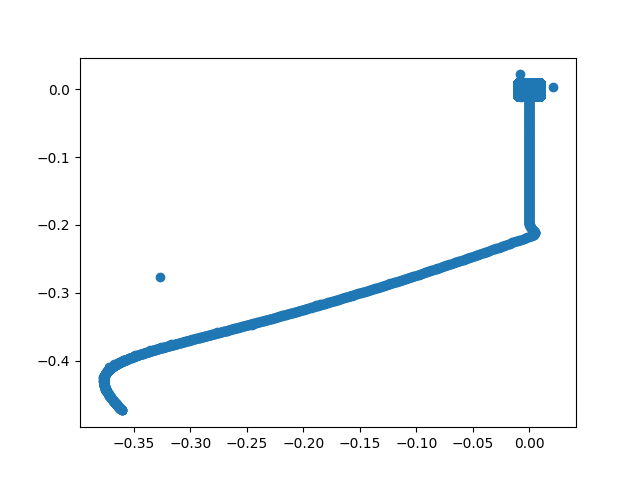

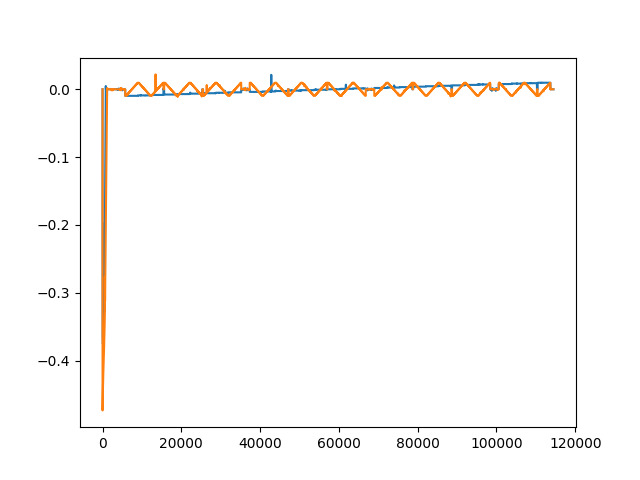

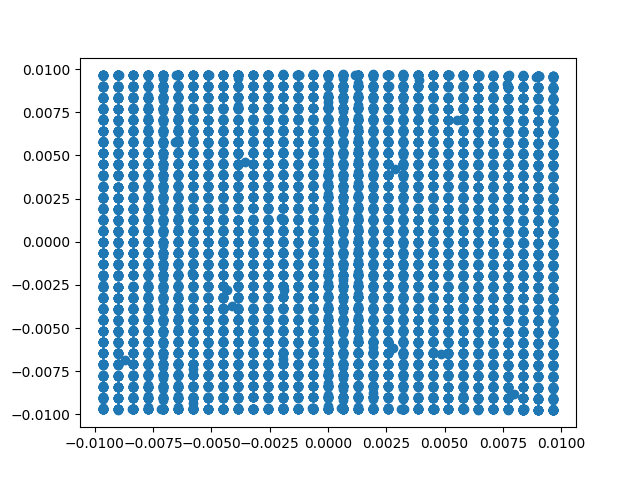

In [5]:
from astrohack.dio import _load_pnt_dict
import xarray as xr
%matplotlib widget
import matplotlib.pyplot as plt
pnt_ds = _load_pnt_dict('/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.point.zarr')

pnt_ds
ant_id = 'ant_ea04'
plt.figure()
plt.scatter(pnt_ds[ant_id].DIRECTIONAL_COSINES[:,0],pnt_ds[ant_id].DIRECTIONAL_COSINES[:,1])
plt.show()

plt.figure()
plt.plot(pnt_ds[ant_id].DIRECTIONAL_COSINES[:,0])
plt.plot(pnt_ds[ant_id].DIRECTIONAL_COSINES[:,1])
plt.show()

ds = xr.open_zarr('/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.holog.zarr/ddi_1/map_0/ant_ea25')
plt.figure()
plt.scatter(ds.DIRECTIONAL_COSINES[:,0],ds.DIRECTIONAL_COSINES[:,1])
plt.show()

# Holog

In [6]:
from astrohack.holog import holog
import numpy as np
cell_size = np.array([-0.0006442, 0.0006442])
grid_size = np.array([31, 31])
grid_interpolation_mode = 'linear' #'nearest' 'linear' 'cubic'
chan_average = True
reference_scaling_frequency = None #1.5*10**10 #None #In Hz
scan_average = True

holog_mds = holog(holog_name='/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.holog.zarr', padding_factor=50, 
      grid_size=grid_size, cell_size=cell_size, grid_interpolation_mode=grid_interpolation_mode,
      chan_average = chan_average,
      reference_scaling_frequency=reference_scaling_frequency,
      scan_average = scan_average,
      overwrite=True,
      phase_fit=True,
      apply_mask=True,
      to_stokes=True,
      parallel=True
     )

holog_mds.summary()

2023-04-11 10:00:38,404 - INFO     - astrohack - (_check_parms.py:115) - Setting default image_file to /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.image.zarr
2023-04-11 10:00:38,406 - INFO     - astrohack - (_check_parms.py:115) - Setting default reference_scaling_frequency to None
2023-04-11 10:00:38,412 - INFO     - astrohack - (_check_parms.py:115) - Setting default ant_list to all
2023-04-11 10:00:38,414 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.image.zarr will be overwritten.
2023-04-11 10:00:38,426 - INFO     - astrohack - (holog.py:78) - Mapping antennas ['ant_ea13', 'ant_ea26', 'ant_ea28', 'ant_ea10', 'ant_ea17', 'ant_ea25', 'ant_ea15', 'ant_ea06', 'ant_ea16', 'ant_ea23']
2023-04-11 10:00:38,427 - INFO     - astrohack - (holog.py:116) - Processing ant_id: ant_ea13 and ddi_9
2023-04-11 10:00:38,429 - INFO     - astrohack - (holog.py:1

In [7]:
holog_mds['ant_ea25']['ddi_1']

<xarray.Dataset>
Dimensions:        (time-centroid: 1, chan: 1, pol: 4, u_prime: 442,
                    v_prime: 442, u: 529, v: 529, l: 31, m: 31, ddi: 1,
                    time_centroid: 1)
Coordinates:
  * chan           (chan) float64 1.417e+10
  * ddi            (ddi) <U5 'ddi_1'
  * l              (l) float64 0.009663 0.009019 ... -0.009019 -0.009663
  * m              (m) float64 -0.009663 -0.009019 ... 0.009019 0.009663
  * pol            (pol) int64 0 1 2 3
  * time_centroid  (time_centroid) float64 5.17e+09
  * u              (u) float64 774.7 771.8 768.8 765.9 ... -768.8 -771.8 -774.7
  * u_prime        (u_prime) float64 648.5 645.6 642.6 ... -639.7 -642.6 -645.6
  * v              (v) float64 -774.7 -771.8 -768.8 -765.9 ... 768.8 771.8 774.7
  * v_prime        (v_prime) float64 -648.5 -645.6 -642.6 ... 639.7 642.6 645.6
Dimensions without coordinates: time-centroid
Data variables:
    AMPLITUDE      (time-centroid, chan, pol, u_prime, v_prime) float64 dask.array<chunksize=(1, 1, 1, 221, 221), meta=np.ndarray>
    ANGLE          (time-centroid, chan, pol, u_prime, v_prime) float64 dask.array<chunksize=(1, 1, 1, 221, 221), meta=np.ndarray>
    APERTURE       (time-centroid, chan, pol, u, v) complex128 dask.array<chunksize=(1, 1, 1, 133, 265), meta=np.ndarray>
    BEAM           (time-centroid, chan, pol, l, m) complex128 dask.array<chunksize=(1, 1, 4, 31, 31), meta=np.ndarray>
Attributes:
    ant_id:          ant_ea25
    ant_name:        ea25
    ddi:             ddi_1
    telescope_name:  EVLA
    time_centroid:   [5170359444.5]

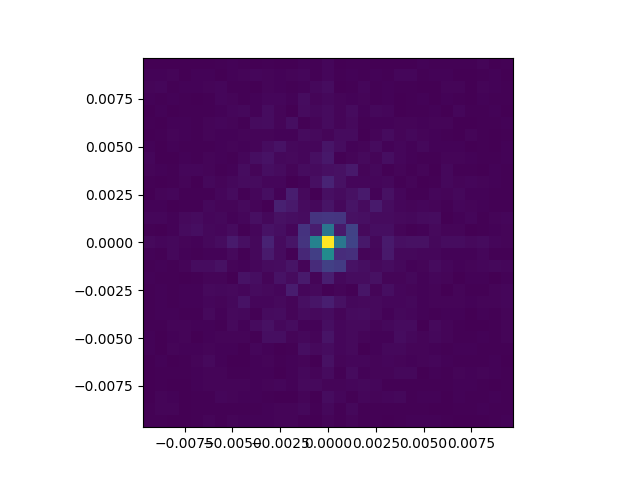

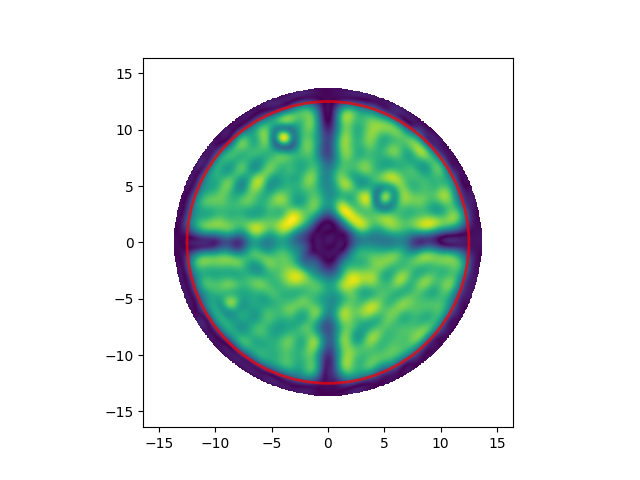

[1.4167e+10]


In [8]:
import xarray as xr
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy
import matplotlib.patches as patches
import scipy.constants

ds = xr.open_zarr('/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.image.zarr/ant_ea25/ddi_1')
wavelength = scipy.constants.speed_of_light/ds.chan.values[0]
l = ds.l.values
m = ds.m.values
u = ds.u.values*wavelength
v = ds.v.values*wavelength

plt.figure()
plt.imshow(np.abs(ds.BEAM[0,0,0,:,:]),extent=[l.min(), l.max(), m.min(), m.max()])
plt.show()

circle = patches.Circle((0,0), 12.5, fill=False, color='red', alpha=0.7, linewidth=2)

fig, ax =plt.subplots()
plt.imshow(np.abs(ds.APERTURE[0,0,0,:,:]),extent=[u.min(), u.max(), v.min(), v.max()])
ax.add_patch(circle)
plt.show()

print(ds.chan.values)



# Panel

In [9]:
from astrohack.panel import panel
ddi = None
panel_model = 'rigid'

panel(
    image_name='/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.image.zarr', 
    panel_model=panel_model,
    unit='mils', 
    parallel=True,
    overwrite=True
)

2023-04-11 10:00:55,433 - INFO     - astrohack - (_check_parms.py:115) - Setting default panel_name to /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.panel.zarr
2023-04-11 10:00:55,435 - INFO     - astrohack - (_check_parms.py:115) - Setting default sel_ddi to all
2023-04-11 10:00:55,436 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.panel.zarr will be overwritten.
2023-04-11 10:00:55,437 - INFO     - astrohack - (panel.py:112) - Processing ddi_15 for ant_ea26
2023-04-11 10:00:55,438 - INFO     - astrohack - (panel.py:112) - Processing ddi_2 for ant_ea26
2023-04-11 10:00:55,439 - INFO     - astrohack - (panel.py:112) - Processing ddi_8 for ant_ea26
2023-04-11 10:00:55,440 - INFO     - astrohack - (panel.py:112) - Processing ddi_5 for ant_ea26
2023-04-11 10:00:55,440 - INFO     - astrohack - (panel.py:112) - Processing ddi_12 for ant_ea26
2023-04-11 

Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', 'ddi_9']
Impossible fit, falling back to mean: ['ea28', '

2023-04-11 10:01:30,419 - INFO     - astrohack - (panel.py:125) - Panel finished processing


{'ant_ea16': {'ddi_4': <xarray.Dataset>
  Dimensions:             (u: 454, v: 454, labels: 172, pars: 3, screws: 4)
  Coordinates:
    * labels              (labels) object '1- 1' '1- 2' '1- 3' ... '6-39' '6-40'
    * pars                (pars) int64 0 1 2
    * screws              (screws) <U2 'il' 'ir' 'ol' 'or'
    * u                   (u) float64 13.72 13.66 13.6 ... -13.54 -13.6 -13.66
    * v                   (v) float64 -13.72 -13.66 -13.6 ... 13.54 13.6 13.66
  Data variables:
      AMPLITUDE           (u, v) float64 dask.array<chunksize=(227, 227), meta=np.ndarray>
      CORRECTIONS         (u, v) float64 dask.array<chunksize=(227, 227), meta=np.ndarray>
      DEVIATION           (u, v) float64 dask.array<chunksize=(227, 227), meta=np.ndarray>
      MASK                (u, v) bool dask.array<chunksize=(454, 454), meta=np.ndarray>
      PANEL_DISTRIBUTION  (u, v) int32 dask.array<chunksize=(227, 227), meta=np.ndarray>
      PANEL_PARAMETERS    (labels, pars) float64 dask.arra

In [10]:
import xarray as xr
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

ds = xr.open_zarr('/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.panel.zarr/VLA_EA25/1/xds.zarr')

u = ds.u.values
v = ds.v.values

plt.figure()
plt.imshow(ds.CORRECTIONS,extent=[u.min(), u.max(), v.min(), v.max()])
plt.colorbar()
plt.show()

FileNotFoundError: No such file or directory: '/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.panel.zarr/VLA_EA25/1/xds.zarr'

In [ ]:
from IPython.display import Image
Image(filename = "/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.panel.zarr/VLA_EA25/1/surface.png", width=1000, height=1000)